In [0]:
!pip install fastai2 > ../dev/null
!pip install utils > ../dev/null  # this is needed for the import below

In [0]:
from utils import *
from fastai2.vision.widgets import *
from fastai2.vision.all import *

# Lesson 2: datablocks and putting your model in production

Hi ! In the second part of the course, Jeremy is showing us how to use more advanced functionalities of the fastai api. We'll practice them with a new example: classify whether the person on the picture is a man or a woman. 


# Get the dataset:
thankfully for us, a nice guy already has put together such a dataset: <a href='https://www.kaggle.com/playlist/men-women-classification'> dataset on kaggle </a>; Please consider taking a minute to go on the link and upvote his dataset if you have a Kaggle account :-) 

However, maybe you don't have a Kaggle account yet, and even if you did, downloading the data and putting in on colab can take some time. 

So I've made a copy on my drive. 
To get it, this link: https://drive.google.com/open?id=1LtUSiFGWMq7wjGVHOFp_TQVmISqoSVbE

<b> then follow the "datasets setup" procedure presented on the ReadMe of the Github</b>: https://github.com/bdubreu/fastpractice/blob/master/README.md

Just run the following cell to get access to YOUR google drive and we'll see how to find the data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Find our data and check its quality 

In [ ]:
# Search this folder to find where you copied the data on your drive: 
%%bash
cd "/content/gdrive/"
ls

Note: if you don't know linux commands, here are some:

- "ls": lists the files in the current directory
- "cd" (change directory) 
     1. if you are in /content/ and do "ls", you'll find "gdrive"; do "cd /gdrive/" to go into that folder
- "cd ../" -> takes you to the parent directory;
    1. if you are in "content/gdrive" and do "cd ../", you'll find yourself in "content/"



If you have copied (or added the link) of the FastPractice folder to your colab, you should find the data at the following place: 

In [0]:
%%bash
cd "../content/gdrive/My Drive/datasets"
cd "men-women-classification"
ls

men
women


In [0]:
# add the Path towards datasets/ to the "datasets" variable:
datasets = Path(_____________)  # fill in the blank

# add 'men-women-classification' to the datasets Path object you just created
path = ________/'________________________'

assert path.ls()[0].name == 'men'

In [0]:
# use the get_image_files function to get the list of the filenames there are in
# the folder 'men-women-classification'

fns = ______________(____)

# You should have 3330 images
print(len(fns))
assert len(fns) == 3330

3330

In [0]:
# Use verify_images() to perform a data quality check on the dataset:
# Note: once you've runned this once, no need to do it every time,
# you'll know your dataset is fine ;)
failed = _____________(___)
failed

(#0) []

## Create DataBlock, Dataloaders and use them to show some pictures

In [0]:
genders = DataBlock(
    blocks=___________________________,  # tuple with ImageBlock and CategoryBlock
    get_items=_______________,  # use the get_image_files function
    splitter=______________(valid_pct=0.2, seed=42),  # RandomSplitter
    get_y=____________,  # classes are separated into folders : use parent_label func
    item_tfms=______(128)  # for now, Resize the image in 128x128px
)

In [0]:
# Do it again, this time without hints:
genders = DataBlock(
    blocks=___________________________,  
    get_items=_______________,  
    splitter=______________(valid_pct=0.2, seed=42),  
    get_y=____________,  
    item_tfms=______(128)  
)

In [0]:
# One last time, without anything at all:
# Note: take this opportunity to try to force you and remember those things

genders = 

assert type (genders) == DataBlock
assert genders.blocks[0] == TransformBlock
assert genders.get_items == get_image_files
assert genders.get_y == parent_label
assert type(genders.item_tfms[1]) == Resize

We have created a DataBlock, but we need to convert it to a dataloader before we can pass it to a learner. 

In [0]:
# There is a Datablock.method that can help you do that
# find it and use the help to know what you need to pass it:

dls = genders.
assert type(dls) == DataLoaders

True

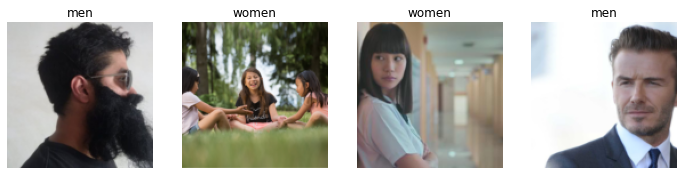

In [0]:
# Use the show_batch method to show 4 images of the train dataset 
dls.train.

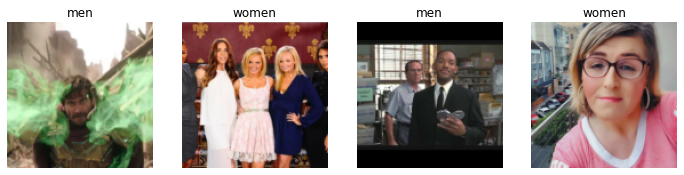

In [0]:
# Do the same thing to show some images of the validation dataset:


## Create the learner, and train it

Create your learner:
- call it learn
- pass it the resnet34 architecture
- pass error_rate as a metric

In [0]:
# It doesn't change compared to the previous lesson, so you get a blank cell here ;)

learn = 
assert type(learn) == Learner

In [0]:
# Fine_tune your model, for how many epochs you'd like :-)
learn.fine_tune(1)

In [0]:
learn.fine_tune(1)

## Data augmentation
problems: 
- few data = subpar results 
- also, we passed 128px images to the model; 

lets see if using a bigger image size and using data augmentation can help:

In [0]:
# The good thing with DataBlock is: we can update it, no need to rewrite it all!
# Use the new method of the "genders" DataBlock we created above to update it
# Jeremy hasn't spent time on Data Augmentation so far in the course, so 
# I won't bother you with the rest of the code here:

genders = genders.___(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())


# Once you have updated your DataBlock, you need to recreate your DataLoaders
# using it: 
dls = 

Note: to be precise, we made a _copy_ of the genders DataBlock and assigned it to genders again. If we had assigned it to genders2, we'd have the old genders still alive, and genders2 which would be a copy + some modifications 

In [0]:
# Re-create your learner, and fine-tune it again :


# Interpretation !!

Interpretation is a very important part of machine learning. Thankfully the fastai provides an api that is way nicer than usual tools. We'll take a look at those:

In [0]:
# Create a ClassificationInterpretation object, and pass it your "learn" object
interp = ____________________________.from_learner(_____)
assert type(interp) == ClassificationInterpretation

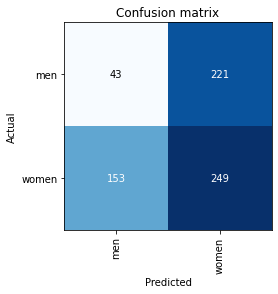

In [0]:
# this interp object has a method that plots a confusion matrix
# find it and use it:

interp.

Note: take some time to consider how this confusion matrix is nicely printed. It makes it easy to understand and interpret. Kudos to the fastai team for putting so much attention into the details !

In [0]:
# Now use the plot_top_losses function 
# to find the 12 images your model struggled the most with 
interp.________________(12, nrows=3)


# Note: as an advanced practitionner, I understand easily confusion matrices,
# even when I just have the numbers printed (as in sklearn, for instance)
# But this plot_top_losses function actually saves me a lot of time ! 

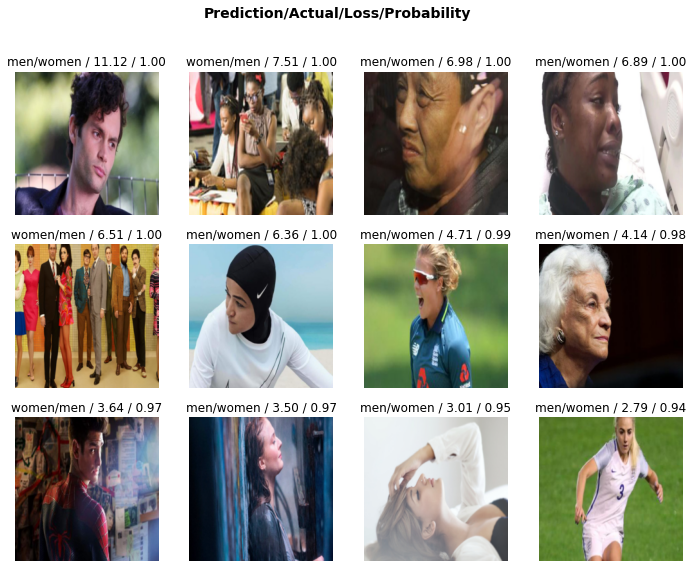

In [0]:
# DON'T RUN THIS CELL or you'll lose the example ^^ 

# Here is the plot_top_losses I got:

Some of these images are not correctly labelled: 
- on the top left pic, the model was right to predict a man. 
- It was right to predict women in the second picture
- Other images shouldn't be in the dataset: the first pic, second row has men AND women in it !

Then, there are true mistakes! can you guess why the model made those mistakes ? 

- For the girls playing sport, my take is that the model has probably seen more example of men playing sports than women.

- For the Spiderman picture (down,left), maybe the model was fooled by the red clothing ?

- Then, for the woman with hair covered, it's possible that the model thought it to be short hair, and then thought it was a man based on that...

All these examples are interesting, because they show how a model could become biased by what it has seen !


In [0]:
# Note: the ImageClassifierCleaner doesn't seem to work properly on Google Colab. 
# cleaner = ImageClassifierCleaner(learn)
# cleaner

## Inference time: export the model and make predictions

In [0]:
# Use the export method of your learner to, well, export it :-°
_____._______()

assert Path().ls(file_exts='.pkl')[0].name == 'export.pkl'
# Note: Path() just creates a Path object to the current directory

In [0]:
# Let's pretend you are now in the environnement of your web app.
# You uploaded the export.pkl file you created above.
# You know want to load it to use it and make prediction
# use the load_learner function to do that:

learn_inference = 
assert type(learn_inference) == Learner


We will now upload a picture a use our model to make the test. Use your pic or one of your friends. I used Jeremy's because that's an example everyone using this notebook should recognize.

In [0]:
# if not in Google Colab use :
# btn_upload = widgets.FileUpload()
# btn_upload

# in Google Colab, use:
from google.colab import files
myfile = files.upload()

Saving jeremy.jpg to jeremy.jpg


In [0]:
img = PILImage.create('jeremy.jpg')

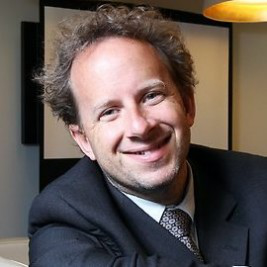

In [0]:
img

In [0]:
# Use the learn_inference model you created above to make a prediction on your picture:

pred,pred_idx,probs = 

In [0]:
pred, pred_idx

('men', tensor(0))

In [0]:
# probs contains the probabilities for each class.
# the sum of all probs elements should therefore be equal to one
# to print only the probability of the prediction, use probs[pred_idx]

In [0]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: men; Probability: 0.9939')

# Want to train a better model ? 
How about using more data ?

You can find 500K images of men and women <a href='https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/'> here </a>.

You won't be able to put all those images on colab, so I suggest you download the "FACES ONLY" part of the "WIKI" part of the dataset. That's 1Gb of data you can fit in Colab.

If you want to try something harder, you can use this dataset not to predict the category (women vs. men), but the age of the person on the picture ;-)

If you face difficulties, post in the forums, you'll get all the help you need ! Good luck ! 